<a href="https://colab.research.google.com/github/fzapfack/advocate1/blob/master/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Main recommendations




1. Use a different metric per day.




-> Monday -> Friday MEDIAN

-> use another level of aggregation for the end of the week.




2. Hours with the maximum orders

8 AM →4 PM




3. Hours with the minimum orders

2.AM -> 7.AM




3. Day with the maximum outliers

Friday

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')
# TRAIN_DATA_LINK = "/content/drive/Shareddrives/data354 - All/data354/1-Project Delivery/1-Clients & products/27-Loxea/data/train.csv"
# TEST_DATA_LINK = "/content/drive/Shareddrives/data354 - All/data354/1-Project Delivery/1-Clients & products/27-Loxea/data/test.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
TRAIN_DATA_LINK = "data/train.csv"
TEST_DATA_LINK = "data/test.csv"

# 1. Librairies & Config

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Data reading & formatting

In [4]:
train_data = pd.read_csv(TRAIN_DATA_LINK)
test_data = pd.read_csv(TEST_DATA_LINK)
df = pd.concat([train_data, test_data], axis=0)
df.drop_duplicates(inplace=True)
print(train_data.shape, test_data.shape, df.shape)
df.head(2)

(28417, 28) (6596, 29) (35013, 29)


,Number,Client anonymisé,Service,Options,PU_address_enc,geomasked_PU_lat,geomasked_PU_lon,At Pickup time,DO_address_enc,geomasked_DO_lat,...,Source,Number of passengers,Journey Time,Mileage,driver_enc,Vehicle,Creation date,Journey Type,As directed hours,Creation_Date
0,34875,Customer 14,Confort,NaN,Cocody,5.365723,-3.966948,2024-04-29 21:12:39.172,Cocody,5.329814,...,Contract,1,0 days 00:04:00,0.0,DRIVER 27,157JR01,2024-04-27 00:00:00.392,NaN,NaN,NaN
1,34977,Customer 1,Confort,NaN,Adresse non définie,5.283028,-3.984759,NaN,Marcory,5.283430,...,Web Portal,1,0 days 00:00:00,0.0,DRIVER 08,AA-018-FH-01,2024-04-29 16:50:34.503,NaN,NaN,NaN


In [5]:
df['Creation date'] = pd.to_datetime(df['Creation date'])

In [6]:
df['Year'] = df['Creation date'].dt.year
df['Month'] = df['Creation date'].dt.month_name()
df['Day Name'] = df['Creation date'].dt.day_name()
df['Hour'] = df['Creation date'].dt.hour
df['Date'] = df['Creation date'].dt.date

# 3. Analysis

In [7]:
daily_df = df.groupby(['Date','Day Name', 'Hour']).size().reset_index(name='orders')
print(daily_df.shape)
daily_df.head(10)

(13303, 4)


,Date,Day Name,Hour,orders
0,2020-12-18,Friday,8,1
1,2020-12-28,Monday,8,1
2,2020-12-29,Tuesday,15,1
3,2020-12-31,Thursday,14,5
4,2020-12-31,Thursday,15,3
5,2021-01-04,Monday,8,1
6,2021-01-04,Monday,9,21
7,2021-01-04,Monday,10,1
8,2021-01-04,Monday,11,1
9,2021-01-04,Monday,14,2


## a. Hourly analysis

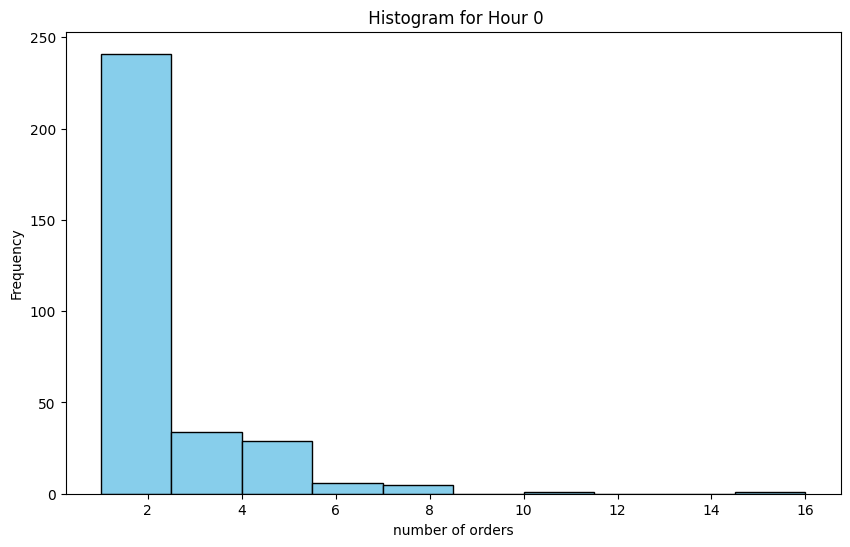

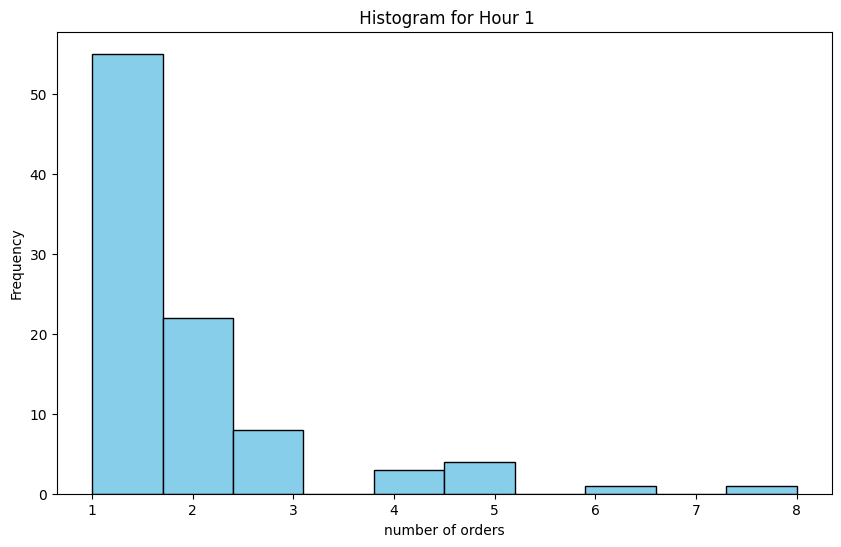

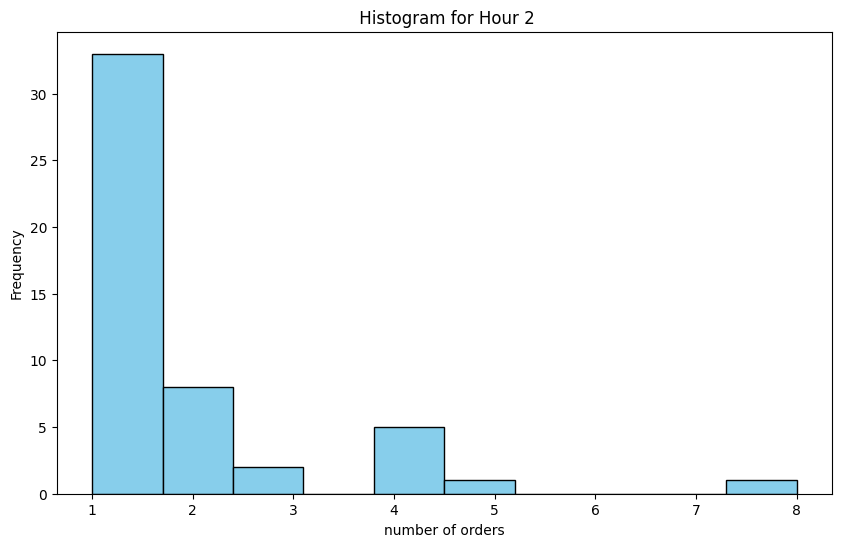

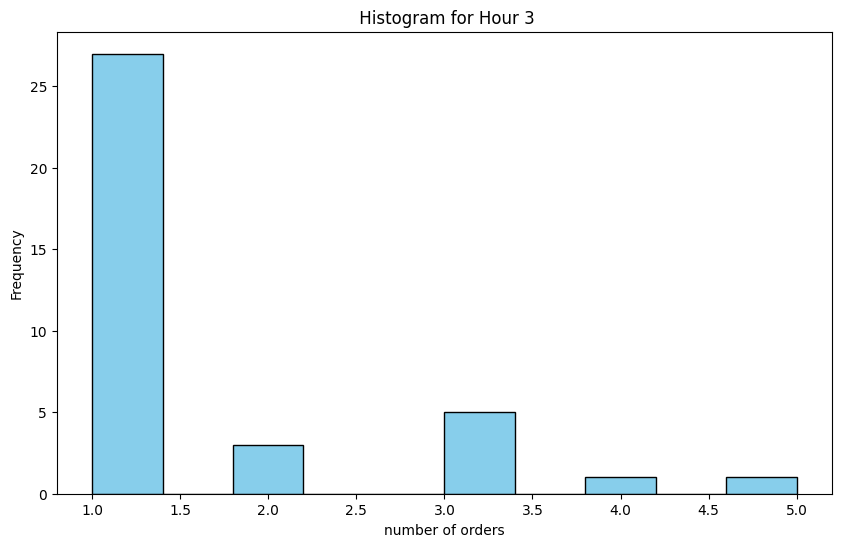

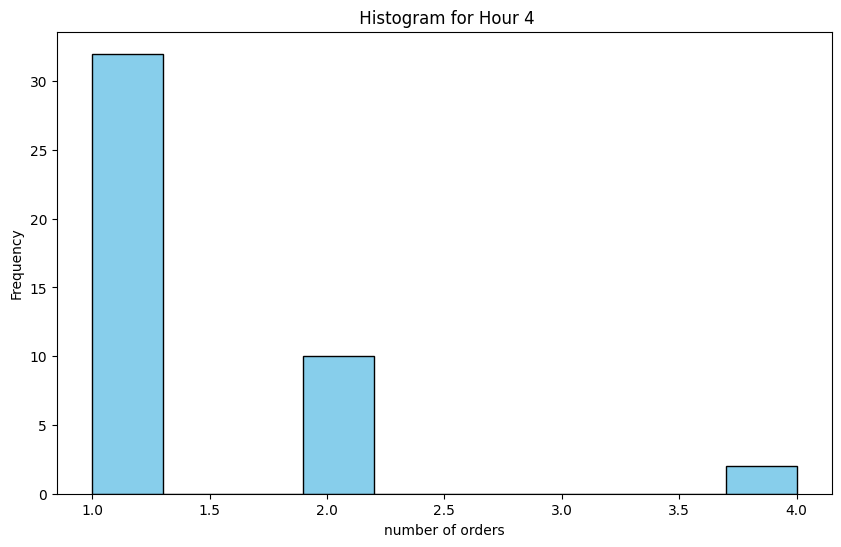

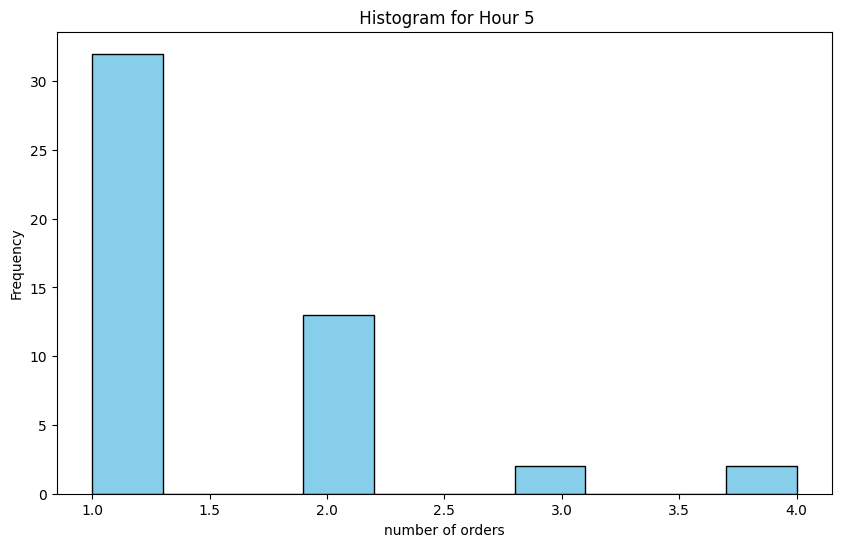

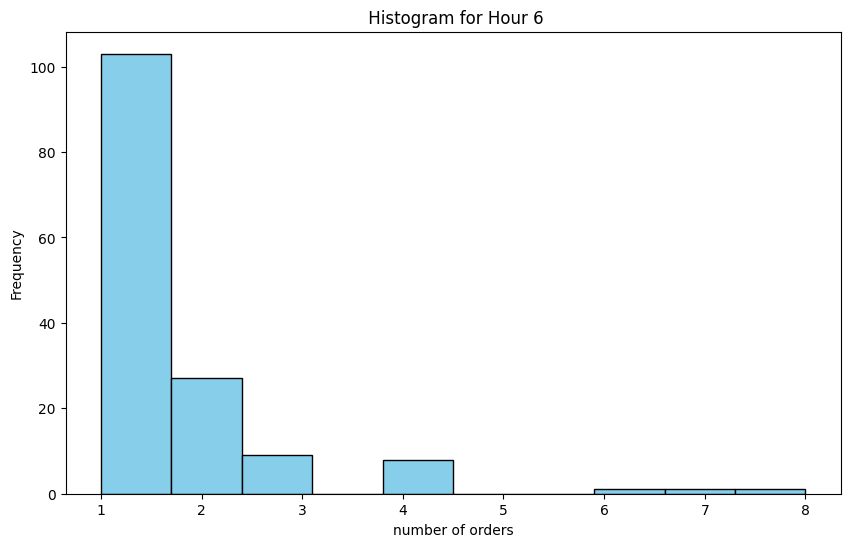

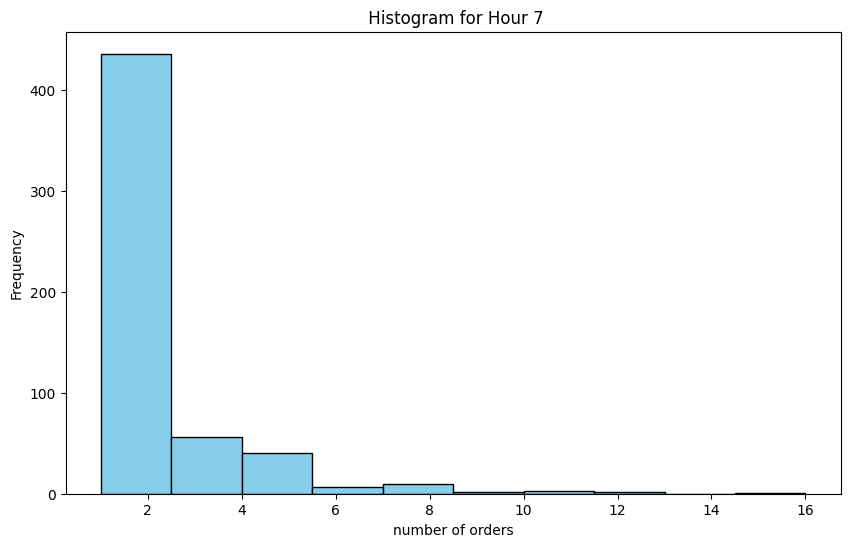

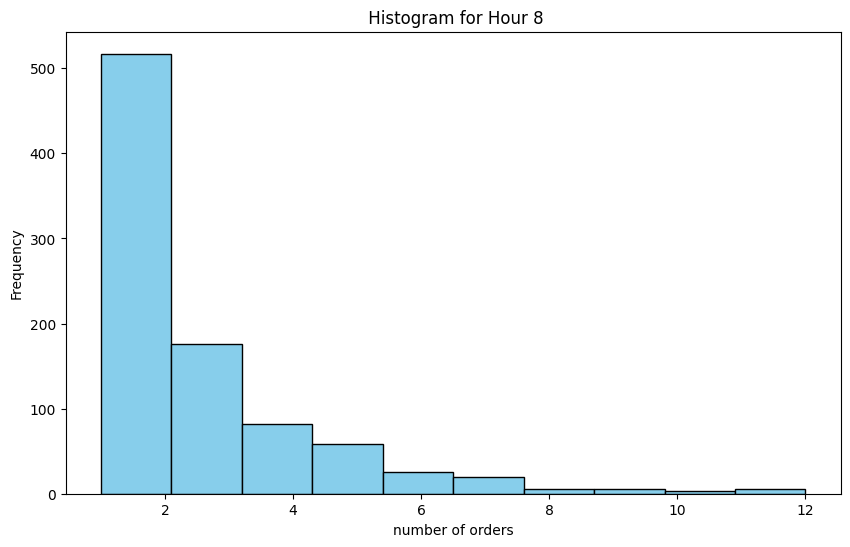

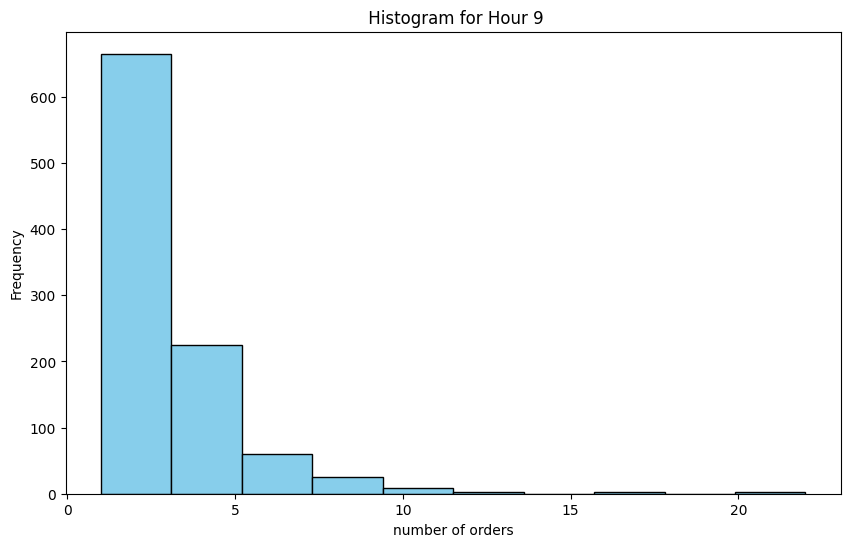

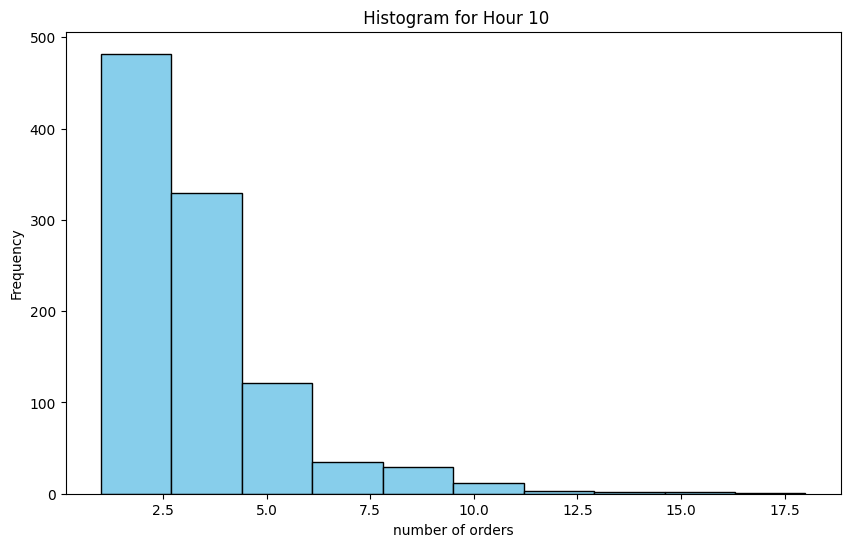

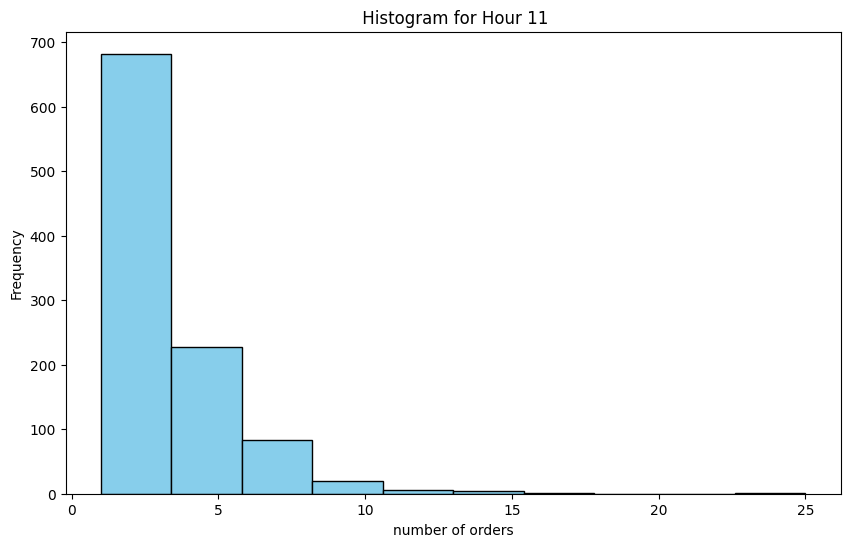

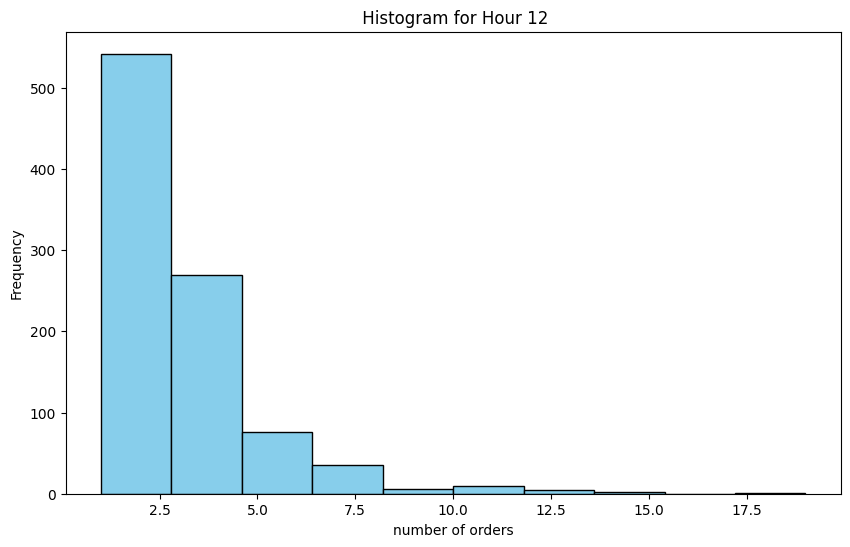

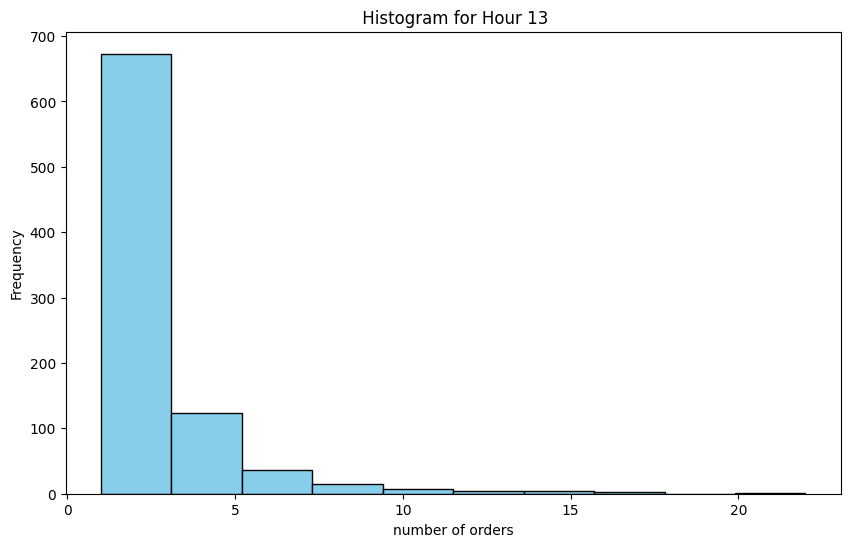

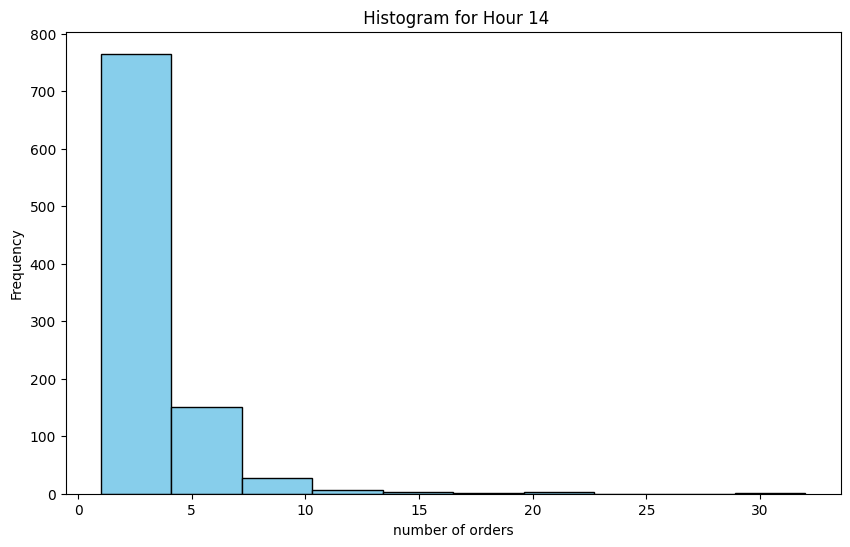

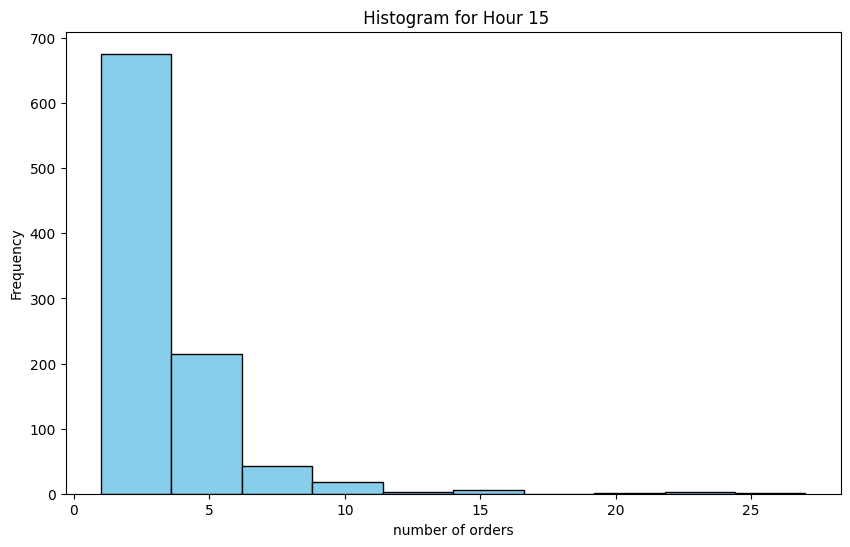

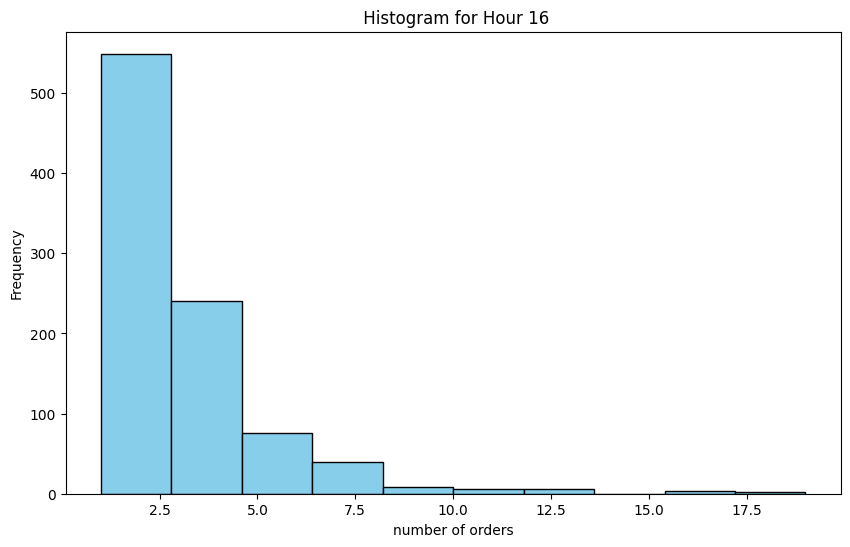

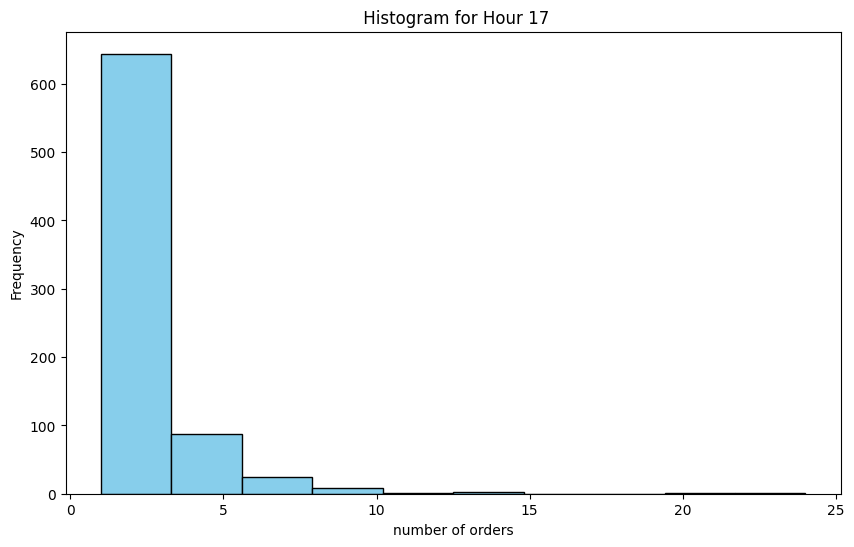

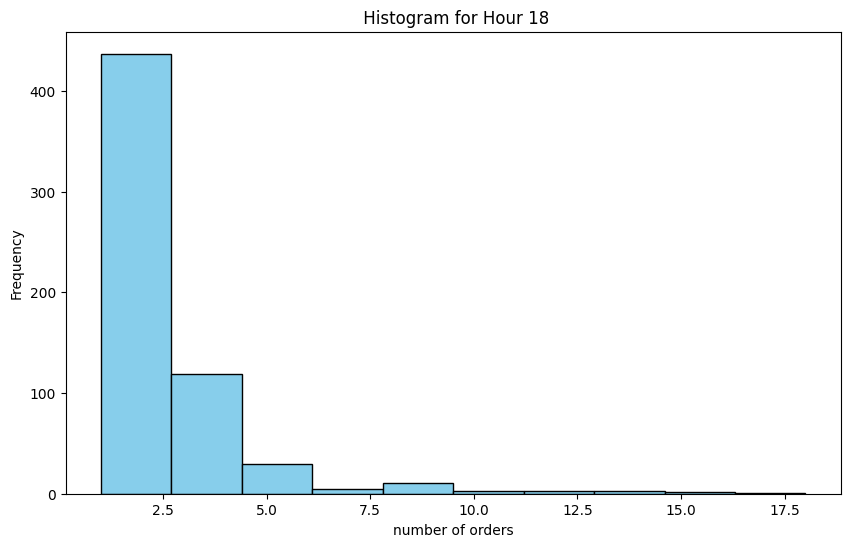

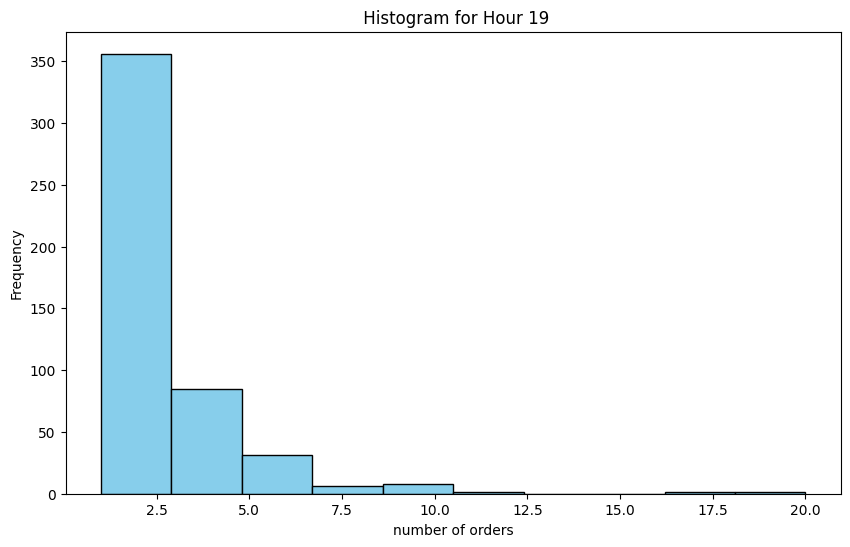

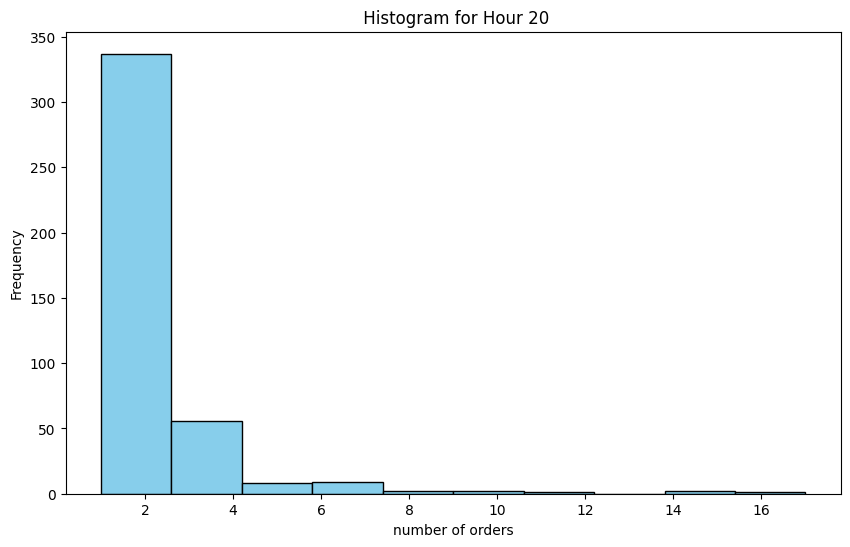

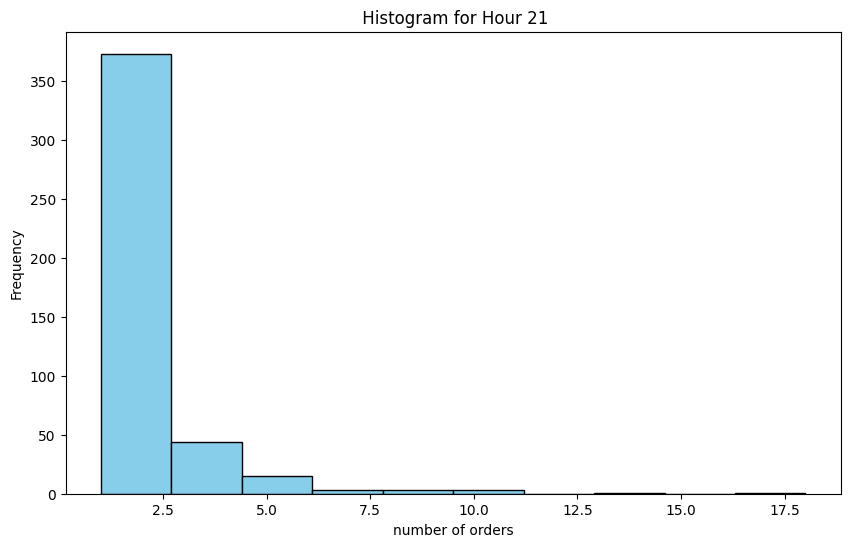

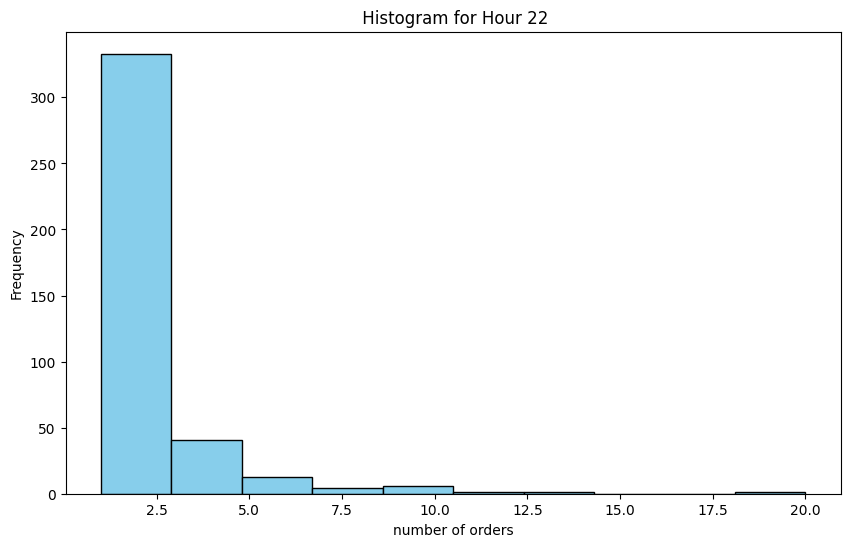

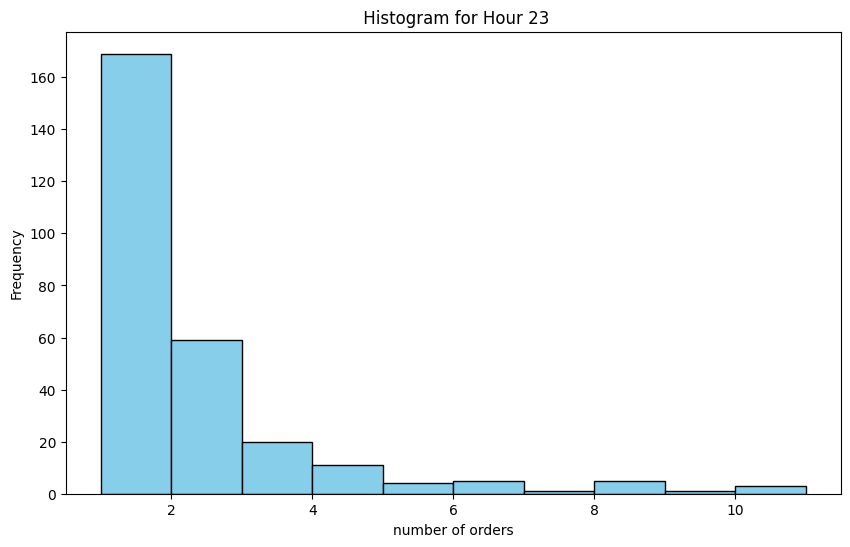

In [ ]:
for i in range(0, 24):
    daily_df[daily_df['Hour'] == i]['orders'].plot(kind='hist', title=f' Histogram for Hour {i}', figsize=(10, 6), color='skyblue', edgecolor='black')
    plt.xlabel('number of orders')
    plt.show()


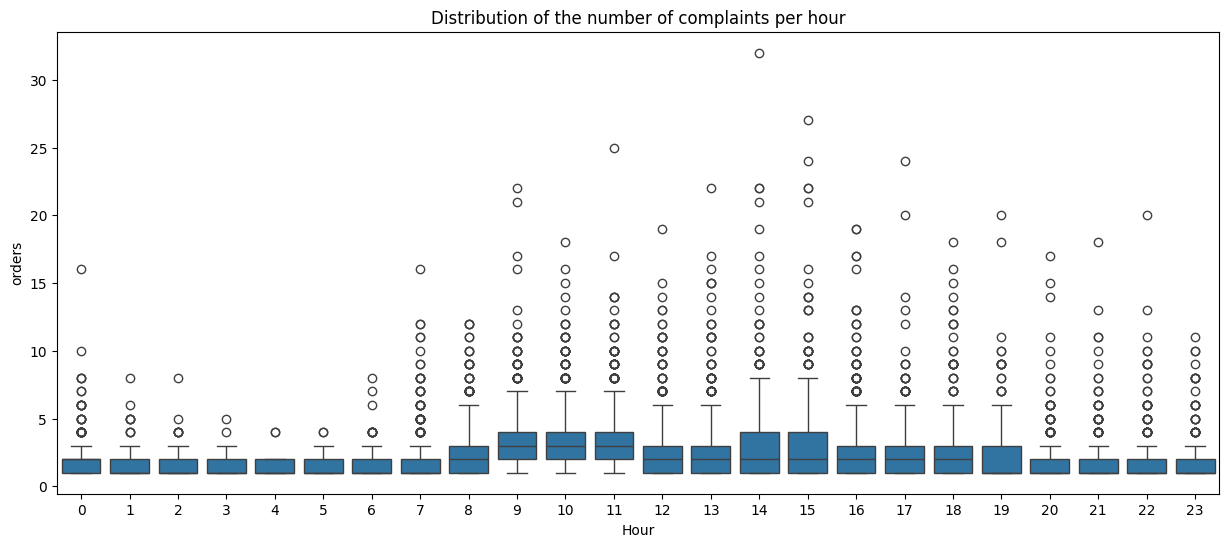

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Hour', y='orders', data=daily_df)
plt.title('Distribution of the number of complaints per hour')
plt.show()

In [ ]:
hour_data = daily_df.groupby('Hour').agg(
    num_orders = ('orders', 'sum'),
    avg_orders = ('orders', 'mean'),
    median_orders = ('orders', 'median'),
    min_orders = ('orders', 'min'),
    max_orders = ('orders', 'max')
    ).reset_index()

In [ ]:
# plot a scatter plot of min, max, average, median orders with plotly
fig = px.scatter(hour_data, x='Hour', y=['num_orders'],
                 title='Number of orders per hours over years', labels={'value': 'Number of Orders', 'variable': 'Order Type'})
fig.show()

In [ ]:
# plot a scatter plot of min, max, average, median orders with plotly
# min is useless here because it is always 1
fig = px.scatter(hour_data, x='Hour', y=['avg_orders', 'median_orders'],
                 title='Number of Orders by Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})
fig.show()

In [ ]:
# plot a scatter plot of min, max, average, median orders with plotly
fig = px.scatter(hour_data, x='Hour', y=['max_orders'],
                 title='Maximun of Orders by Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})
fig.show()

# 4. Daily x Hourly analysis

In [8]:
day_hour_df = daily_df.groupby(['Day Name', 'Hour']).agg(
    num_orders = ('orders', 'sum'),
    avg_orders = ('orders', 'mean'),
    median_orders = ('orders', 'median'),
    min_orders = ('orders', 'min'),
    max_orders = ('orders', 'max')


).reset_index()

In [10]:
day_hour_df

,Day Name,Hour,num_orders,avg_orders,median_orders,min_orders,max_orders
0,Friday,0,54,2.250000,2.0,1,5
1,Friday,1,29,1.526316,1.0,1,4
2,Friday,2,16,2.000000,1.0,1,5
3,Friday,3,9,1.800000,1.0,1,3
4,Friday,4,4,1.333333,1.0,1,2
...,...,...,...,...,...,...,...
163,Wednesday,19,157,2.211268,2.0,1,20
164,Wednesday,20,154,2.000000,2.0,1,8
165,Wednesday,21,131,1.926471,1.0,1,11
166,Wednesday,22,127,2.081967,1.0,1,9


In [9]:
fig = px.scatter(day_hour_df, x='Hour', y='Day Name', size='num_orders', color='num_orders',
                 title='Number of Orders by Day and Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})
fig.update_yaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()


In [11]:
fig = px.scatter(day_hour_df, x='Hour', y='Day Name', size='avg_orders', color='avg_orders',
                 title='Mean of Orders by Day and Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})
fig.update_yaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()

In [12]:
fig = px.scatter(day_hour_df, x='Hour', y='Day Name', size='median_orders', color='median_orders',
                 title='median Orders by Day and Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})

fig.update_yaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()


In [13]:

fig = px.scatter(day_hour_df, x='Hour', y='Day Name', size='max_orders', color='max_orders',
                 title='max of Orders by Day and Hour', labels={'value': 'Number of Orders', 'variable': 'Order Type'})

fig.update_yaxes(categoryorder='array', categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig.show()
